In [2]:
train_path = "/Users/kailing/Desktop/UCSD academics/CSE 151B/kaggle/new_train/new_train"
val_path = "/Users/kailing/Desktop/UCSD academics/CSE 151B/kaggle/new_val_in/new_val_in"
submission_path = "/Users/kailing/Desktop/UCSD academics/CSE 151B/kaggle/sample_submission.csv"
submission_dir = "/Users/kailing/Desktop/UCSD academics/CSE 151B/kaggle/submissions"

In [1]:
NUM_EPOCH = 1
BATCH_SIZE = 64
LEARNING_RATE = 1e-3

In [3]:
import os
import pickle
import numpy as np
from glob import glob
import pandas as pd
from tqdm import tqdm
from typing import Tuple
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader

# Data

In [4]:
class ArgoverseDataset(Dataset):
    def __init__(self, data_path: str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.data_path = data_path
        self.transform = transform

        self.pkl_list = glob(os.path.join(self.data_path, '*'))
        self.pkl_list.sort()
        
    def __len__(self):
        return len(self.pkl_list)

    def __getitem__(self, idx):

        pkl_path = self.pkl_list[idx]
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
        
        if self.transform:
            data = self.transform(data)

        return data

In [6]:
train = ArgoverseDataset(data_path=train_path)
val = ArgoverseDataset(data_path=val_path)

In [121]:
def my_collate(batch):
    """ collate lists of samples into batches, create [ batch_sz x agent_sz x seq_len x feature] """
    inp, out = [], []
    for scene in batch:
        agent_idx = np.where(scene["agent_id"] == np.unique(scene["track_id"].flatten()))[0][0]
        inp.append(np.hstack([scene['p_in'][agent_idx], scene['v_in'][agent_idx]]))
        # out.append(np.hstack([scene['p_out'][agent_idx], scene['v_out'][agent_idx]]))
        out.append(scene['p_out'][agent_idx])

    inp = torch.FloatTensor(inp)
    out = torch.FloatTensor(out)
    return [inp, out]

train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle = False, collate_fn=my_collate, num_workers=0)
val_loader = DataLoader(val, batch_size=BATCH_SIZE, shuffle = False, collate_fn=my_collate, num_workers=0)
exmaple = iter(train_loader)
exmaple.next()[0][0]

tensor([[3.2354e+03, 1.9295e+03, 2.5700e-01, 3.1313e-01],
        [3.2359e+03, 1.9298e+03, 4.6091e+00, 3.1098e+00],
        [3.2359e+03, 1.9299e+03, 8.8960e-01, 1.0443e+00],
        [3.2373e+03, 1.9315e+03, 1.3368e+01, 1.6047e+01],
        [3.2378e+03, 1.9317e+03, 5.1234e+00, 2.2956e+00],
        [3.2383e+03, 1.9323e+03, 4.6713e+00, 5.8263e+00],
        [3.2387e+03, 1.9326e+03, 4.5387e+00, 3.1254e+00],
        [3.2391e+03, 1.9327e+03, 3.4147e+00, 1.0973e+00],
        [3.2396e+03, 1.9335e+03, 5.7870e+00, 7.9927e+00],
        [3.2402e+03, 1.9340e+03, 5.1474e+00, 5.0185e+00],
        [3.2406e+03, 1.9344e+03, 4.0382e+00, 3.1020e+00],
        [3.2410e+03, 1.9350e+03, 4.8599e+00, 6.0268e+00],
        [3.2415e+03, 1.9354e+03, 5.0286e+00, 4.8091e+00],
        [3.2420e+03, 1.9357e+03, 4.7979e+00, 2.0820e+00],
        [3.2424e+03, 1.9359e+03, 3.4249e+00, 2.8949e+00],
        [3.2428e+03, 1.9363e+03, 4.7367e+00, 3.7335e+00],
        [3.2431e+03, 1.9365e+03, 2.8242e+00, 1.9251e+00],
        [3.243

In [8]:
submission = pd.read_csv(submission_path)
submission

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,9897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3196,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3197,9905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3198,9910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Explore

In [6]:
train_0 = train[0]

In [7]:
train_0['p_in'].shape

(60, 19, 2)

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])
(60, 19, 2) (60, 30, 2)
(60, 30, 1)
00000000-0000-0000-0000-000000000062


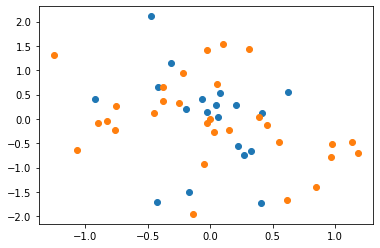

In [8]:
import matplotlib.pyplot as plt

scene = train[0]
print(train[0].keys())

pos_in = scene["v_in"]
pos_out = scene["v_out"]
print(pos_in.shape, pos_out.shape)
track_id = scene["track_id"]
print(track_id.shape)
car_id  = 2
agent_id = scene["agent_id"]
print(agent_id)
plt.scatter(pos_in[car_id,:,0], pos_in[car_id,:,1])
plt.scatter(pos_out[car_id,:,0], pos_out[car_id,:,1])

# Baseline (Constant velocity)

In [9]:
train_0 = train[2323]

In [10]:
train_0['p_in']
train_0['track_id'][:, :, 0]
train_0['agent_id']

'00000000-0000-0000-0000-000000014742'

In [11]:
train_0['p_in'][4]

array([[ 568.38769531, 2098.21240234],
       [ 568.30877686, 2095.91650391],
       [ 568.55822754, 2095.08422852],
       [ 568.50262451, 2093.97949219],
       [ 568.68048096, 2093.05029297],
       [ 568.45727539, 2091.95922852],
       [ 568.59118652, 2090.98071289],
       [ 568.79071045, 2090.078125  ],
       [ 568.73016357, 2088.91430664],
       [ 568.71337891, 2088.06567383],
       [ 568.86688232, 2086.9675293 ],
       [ 568.77008057, 2085.92822266],
       [ 568.71276855, 2084.92797852],
       [ 568.78063965, 2083.88330078],
       [ 568.89666748, 2082.72973633],
       [ 568.90222168, 2082.15283203],
       [ 568.89044189, 2081.23144531],
       [ 568.84240723, 2080.14941406],
       [ 568.82531738, 2079.04956055]])

In [226]:
train_0["agent_id"]

'00000000-0000-0000-0000-000000014742'

In [248]:
agent_idx = np.where(train_0["agent_id"] == np.unique(train_0["track_id"].flatten()))[0][0]

In [267]:
np.hstack([scene['p_in'][agent_idx], scene['v_in'][agent_idx]]).shape 

(19, 4)

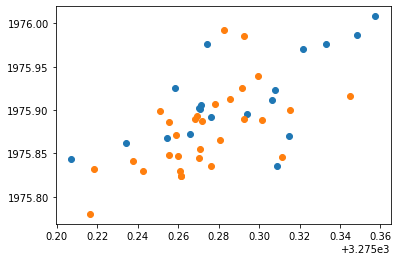

In [147]:
plt.scatter(train_0["p_in"][3][:, 0], train_0["p_in"][3][:, 1])
plt.scatter(train_0["p_out"][3][:, 0], train_0["p_out"][3][:, 1])

# Preprocessing

# Training

In [173]:
class RMSELoss(torch.nn.Module):
    """RMSE Loss"""
    def __init__(self):
        super(RMSELoss, self).__init__()

    def forward(self, yhat, y):
        criterion = nn.MSELoss()
        loss = torch.sqrt(criterion(yhat, y))
        return loss

## constant velocity

In [13]:
def get_mean_velocity(coords: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """Get mean velocity of the observed trajectory.
    Args:
        coords: Coordinates for the trajectory
    Returns:
        Mean velocity along x and y
    """
    vx, vy = (
        np.zeros((coords.shape[0], coords.shape[1] - 1)),
        np.zeros((coords.shape[0], coords.shape[1] - 1)),
    )

    for i in range(1, coords.shape[1]):
        vx[:, i - 1] = (coords[:, i, 0] - coords[:, i - 1, 0]) / 0.1
        vy[:, i - 1] = (coords[:, i, 1] - coords[:, i - 1, 1]) / 0.1
    vx = np.mean(vx, axis=1)
    vy = np.mean(vy, axis=1)

    return vx, vy


def predict(obs_trajectory: np.ndarray, vx: np.ndarray, vy: np.ndarray,
            pred_len: int) -> np.ndarray:
    """Predict future trajectory given mean velocity.
    Args:
        obs_trajectory: Observed Trajectory
        vx: Mean velocity along x
        vy: Mean velocity along y
        args: Arguments to the baseline
    Returns:
        pred_trajectory: Future trajectory
    """
    pred_trajectory = np.zeros((obs_trajectory.shape[0], pred_len, 2))

    prev_coords = obs_trajectory[:, -1, :]
    for i in range(pred_len):
        pred_trajectory[:, i, 0] = prev_coords[:, 0] + vx * 0.1
        pred_trajectory[:, i, 1] = prev_coords[:, 1] + vy * 0.1
        prev_coords = pred_trajectory[:, i]

    return pred_trajectory

In [14]:
df = pd.DataFrame()
# df['ID'] = submission['ID']
for i in range(1, 61):
    df[f'v{i}'] = np.zeros(len(submission))
    
for i, scene in tqdm(enumerate(val)):
    agent_id = scene['agent_id']
    track_ids = [track_id[0] for track_id in scene['track_id']]
    agent_ix = track_ids.index(agent_id)
    
    vx, vy = get_mean_velocity(val[i]['p_in'])
    predicted_trajectory = predict(val[i]['p_in'], vx, vy, 30)
    df.iloc[i] = predicted_trajectory[agent_ix].flatten()

3200it [00:16, 191.86it/s]


## Baseline LSTM

In [10]:
from torch import nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

In [ ]:
class MotionPlanningModel(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, output_feature=2, n_layers=1):
        super(MotionPlanningModel, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        
        self.lstm = nn.LSTM(input_size = n_features, 
                            hidden_size = self.n_hidden,
                            num_layers = self.n_layers, 
#                             batch_first = True
                           )
        self.linear = nn.Linear(in_features=n_hidden, out_features=output_feature)
        
    def init_hidden(self, batch_size):
        # even with batch_first = True this remains same as docs
        hidden_state = torch.zeros(self.n_layers, batch_size, self.n_hidden)
        cell_state = torch.zeros(self.n_layers, batch_size, self.n_hidden)
        self.hidden = (hidden_state, cell_state)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        self.hidden = self.init_hidden(batch_size)
        
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        x = lstm_out.contiguous().view(batch_size,-1)
        return self.linear(x)

In [352]:
# model training
model = MotionPlanningModel(4, 8, 2)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [353]:
for epoch in range(NUM_EPOCH):
    for i_batch, batch_data in enumerate(train_loader):
        inp, out = batch_data

        # forward
        y_pred = model(inp)
        loss = loss_fn(y_pred, inp[:, :, :2])
        
        # backward
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if i_batch % 200 == 0:
            print(f"Epoch {epoch+1}/{NUM_EPOCH}, batch {i_batch}/{len(train_loader)}, loss: {loss.item():.4f}")
        
        # visualization
        # show_sample_batch(sample_batch, agent_id)


Epoch 1/1, batch 0/3218, loss: 4806438.0000


KeyboardInterrupt: 

## Encoder Decoder (Seq2Seq)

In [158]:
# training config
NUM_EPOCH = 1
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
ROLLOUT_LEN = 30

# model config
INPUT_SIZE = 4
EMBEDDING_SIZE = 8
HIDDEN_SIZE = 16
OUTPUT_SIZE = 2

In [43]:
class EncoderLSTM(nn.Module):
    def __init__(self, input_size, embedding_size=EMBEDDING_SIZE, hidden_size=HIDDEN_SIZE):
        super(EncoderLSTM, self).__init__()
        self.hidden_size = hidden_size

        self.linear = nn.Linear(input_size, embedding_size)
        self.lstm = nn.LSTMCell(embedding_size, hidden_size)

    def init_hidden(self, batch_size, hidden_size):
        # Initialize encoder hidden state
        return (
            torch.zeros(batch_size, hidden_size),
            torch.zeros(batch_size, hidden_size),
        )
    
    def forward(self, X):
        init_hidden = self.init_hidden(X.shape[0], self.hidden_size)
        
        embedded = F.relu(self.linear(X))
        hidden_state = self.lstm(embedded, init_hidden)
        return hidden_state

In [63]:
class DecoderLSTM(nn.Module):
    def __init__(self, embedding_size=EMBEDDING_SIZE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT_SIZE):
        super(DecoderLSTM, self).__init__()
        self.hidden_size = hidden_size
        
        self.linear1 = nn.Linear(output_size, embedding_size)
        self.lstm1 = nn.LSTMCell(embedding_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, X, encoder_hidden):        
        embedded = F.relu(self.linear1(X))
        hidden = self.lstm1(embedded, encoder_hidden)
        output = self.linear2(hidden[0])
        return output, hidden


In [64]:
# model training
encoder = EncoderLSTM(INPUT_SIZE)
decoder = DecoderLSTM()

loss_fn = nn.MSELoss(reduction="mean")
encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr=LEARNING_RATE)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=LEARNING_RATE)

In [159]:
for epoch in range(NUM_EPOCH):
    for i_batch, batch_data in enumerate(train_loader):
        inp, out = batch_data

        # Initialize losses
        loss = 0

        # Encoder
        batch_size = inp.shape[0]
        input_length = inp.shape[1]
        output_length = out.shape[1]
        input_shape = inp.shape[2]

        # Get relative position
        initial_p_in = inp[:, 0, :2].detach().clone()
        inp[:, :, :2] = inp[:, :, :2] - initial_p_in[:, None]
        
        # Encode observed trajectory
        for i in range(input_length):
            encoder_input = inp[:, i, :]
            encoder_hidden = encoder(encoder_input)
        
        # Initialize decoder input with last coordinate in encoder
        decoder_hidden = encoder_hidden
        decoder_input = encoder_input[:, :2]
        decoder_outputs = torch.zeros(out.shape)

        # Decode hidden state in future trajectory
        for i in range(output_length):
            decoder_output, decoder_hidden = decoder(decoder_input, encoder_hidden)
            decoder_outputs[:, i, :] = decoder_output

            # Update loss
            loss += loss_fn(decoder_output[:, :2], out[:, i, :2] - initial_p_in)

            # Use own predictions as inputs at next step
            decoder_input = decoder_output

        # Get average loss for pred_len
        loss = loss / output_length

        # Backpropagate
        loss.backward()
        encoder_optimizer.step()
        decoder_optimizer.step()
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        if i_batch % 200 == 0:
            print(f"Epoch {epoch+1}/{NUM_EPOCH}, batch {i_batch}/{len(train_loader)}, loss: {loss.item():.4f}")
        

Epoch 1/1, batch 0/3218, loss: 4385598.5000
Epoch 1/1, batch 200/3218, loss: 3735017.7500
Epoch 1/1, batch 400/3218, loss: 4243777.5000
Epoch 1/1, batch 600/3218, loss: 4273490.0000


KeyboardInterrupt: 

In [161]:
initial_p_in[6]

tensor([ 753.5497, 1672.8301])

In [172]:
decoder_input

tensor([[127.4644, 127.3252],
        [127.4642, 127.3251],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4643, 127.3252],
        [127.4644, 127.3252],
        [127.4643, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4643, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4641, 127.3250],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [127.4619, 127.3227],
        [127.4643, 127.3252],
        [127.4644, 127.3252],
        [127.4644, 127.3252],
        [1

In [163]:
out[6]

tensor([[ 736.9389, 1672.0554],
        [ 736.1733, 1672.0210],
        [ 734.3145, 1671.9967],
        [ 733.7044, 1671.7981],
        [ 732.7556, 1671.7660],
        [ 731.9318, 1671.7726],
        [ 730.9580, 1671.7212],
        [ 730.9580, 1671.7212],
        [ 729.2341, 1671.6437],
        [ 728.2950, 1671.6367],
        [ 727.4012, 1671.5852],
        [ 726.5402, 1671.5430],
        [ 725.5793, 1671.5128],
        [ 724.6547, 1671.4709],
        [ 723.7803, 1671.4264],
        [ 722.8222, 1671.4019],
        [ 721.9526, 1671.3153],
        [ 721.3202, 1671.1366],
        [ 720.2152, 1671.2380],
        [ 719.3371, 1671.2791],
        [ 718.3492, 1671.2631],
        [ 717.4954, 1671.2170],
        [ 716.5472, 1671.2205],
        [ 715.9681, 1670.9893],
        [ 715.0989, 1670.9535],
        [ 714.2052, 1670.9545],
        [ 713.5739, 1670.9510],
        [ 712.3006, 1670.8611],
        [ 711.3686, 1670.9117],
        [ 710.6022, 1670.8773]])

# Submission

In [272]:
df['ID'] = submission['ID']
cols = df.columns[-1:].tolist() + df.columns[:-1].tolist()
df = df[cols]

In [273]:
from datetime import datetime
def save_submission(df, filename):
    filename = filename + "_" + str(datetime.now()) + ".csv"
    file_path = os.path.join(submission_dir, filename)
    df.to_csv(file_path, index=False)

In [274]:
save_submission(df, "constant_velocity")

In [239]:
df

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
0,10002,1713.862671,336.298737,1713.862671,336.298737,1713.862671,336.298737,1713.862671,336.298737,1713.862671,...,1713.862671,336.298737,1713.862671,336.298737,1713.862671,336.298737,1713.862671,336.298737,1713.862671,336.298737
1,10015,725.536499,1229.961182,725.536499,1229.961182,725.536499,1229.961182,725.536499,1229.961182,725.536499,...,725.536499,1229.961182,725.536499,1229.961182,725.536499,1229.961182,725.536499,1229.961182,725.536499,1229.961182
2,10019,573.804321,1244.689453,573.804321,1244.689453,573.804321,1244.689453,573.804321,1244.689453,573.804321,...,573.804321,1244.689453,573.804321,1244.689453,573.804321,1244.689453,573.804321,1244.689453,573.804321,1244.689453
3,10028,1690.753540,315.093414,1690.753540,315.093414,1690.753540,315.093414,1690.753540,315.093414,1690.753540,...,1690.753540,315.093414,1690.753540,315.093414,1690.753540,315.093414,1690.753540,315.093414,1690.753540,315.093414
4,1003,2124.079834,678.186646,2124.079834,678.186646,2124.079834,678.186646,2124.079834,678.186646,2124.079834,...,2124.079834,678.186646,2124.079834,678.186646,2124.079834,678.186646,2124.079834,678.186646,2124.079834,678.186646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,9897,256.193787,805.615295,256.193787,805.615295,256.193787,805.615295,256.193787,805.615295,256.193787,...,256.193787,805.615295,256.193787,805.615295,256.193787,805.615295,256.193787,805.615295,256.193787,805.615295
3196,99,587.835754,1154.503662,587.835754,1154.503662,587.835754,1154.503662,587.835754,1154.503662,587.835754,...,587.835754,1154.503662,587.835754,1154.503662,587.835754,1154.503662,587.835754,1154.503662,587.835754,1154.503662
3197,9905,1755.736572,443.865265,1755.736572,443.865265,1755.736572,443.865265,1755.736572,443.865265,1755.736572,...,1755.736572,443.865265,1755.736572,443.865265,1755.736572,443.865265,1755.736572,443.865265,1755.736572,443.865265
3198,9910,574.704407,1289.077393,574.704407,1289.077393,574.704407,1289.077393,574.704407,1289.077393,574.704407,...,574.704407,1289.077393,574.704407,1289.077393,574.704407,1289.077393,574.704407,1289.077393,574.704407,1289.077393
